Linear Regression – ML Example Notebook

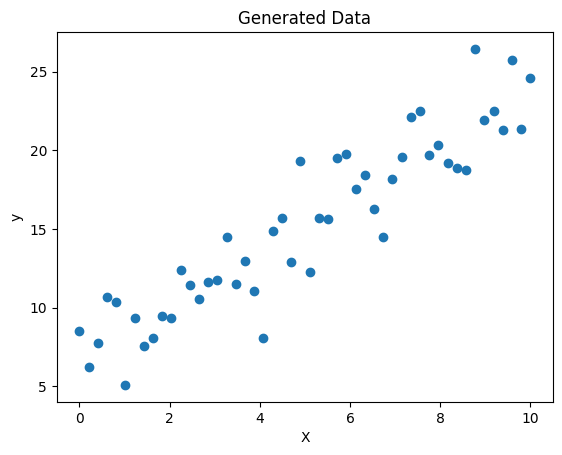

Intercept (b0): 6.6927410376163845
Slope (b1): 1.7176755014019625


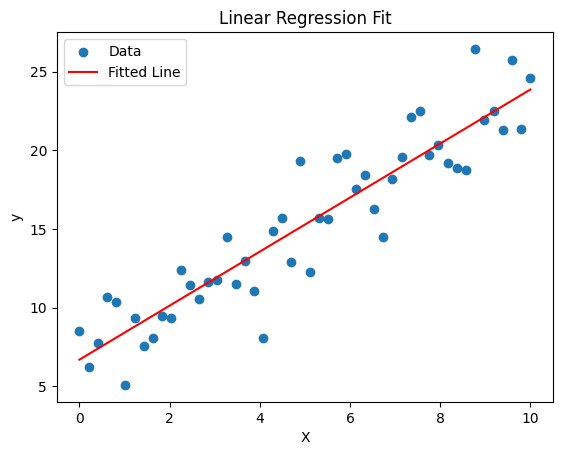

Mean Squared Error (MSE): 4.375870091712565
Gradient Descent Result: b0 = 6.652488050318268 , b1 = 1.7236975228630738


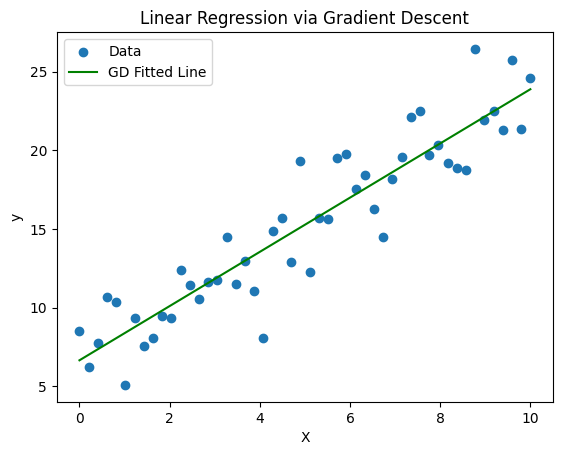

In [2]:
# ========================================
# Import Libraries
# ========================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ========================================
# PART 1: Create Sample Data
# ========================================
# y = 2x + 5 + noise
np.random.seed(0)
X = np.linspace(0, 10, 50).reshape(-1,1)  # Feature (matrix)
y = 2*X.flatten() + 5 + np.random.normal(0, 2, 50)  # Target

plt.scatter(X, y)
plt.title("Generated Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# ========================================
# PART 2: Fit Linear Regression Model (scikit-learn)
# ========================================
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

# Plot fitted line
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# ========================================
# PART 3: Model Evaluation
# ========================================
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# ========================================
# PART 4: Manual Gradient Descent
# ========================================
# Goal: minimize loss = MSE
# Loss: L = (1/n) * sum((y - (b0 + b1*x))^2)
# Gradient formulas:
# dL/db0 = -(2/n) * sum(y - (b0 + b1*x))
# dL/db1 = -(2/n) * sum(x*(y - (b0 + b1*x)))

# Initialize
b0, b1 = 0, 0
lr = 0.01  # learning rate
n = len(X)
epochs = 1000

for i in range(epochs):
    y_hat = b0 + b1*X.flatten()
    db0 = -(2/n) * np.sum(y - y_hat)
    db1 = -(2/n) * np.sum(X.flatten() * (y - y_hat))
    b0 -= lr * db0
    b1 -= lr * db1

print("Gradient Descent Result: b0 =", b0, ", b1 =", b1)

# Plot gradient descent line
plt.scatter(X, y, label="Data")
plt.plot(X, b0 + b1*X, color="green", label="GD Fitted Line")
plt.title("Linear Regression via Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
